Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [3]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [21]:
#preliminary look at the data
print(df.head())
print(df.info())

   bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   pr

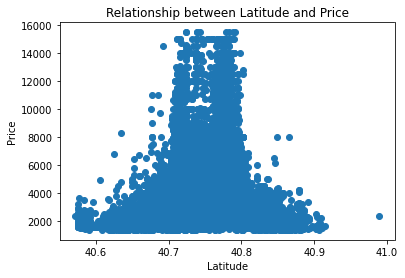

In [36]:
#define target and feature variables
y = df['price']
x = df['latitude']
X = df[['latitude']]

#make a scatter plot of latitude to price
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title('Relationship between Latitude and Price')
plt.xlabel('Latitude')
plt.ylabel('Price')

plt.show()

In [46]:
#make a one-feature regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

new_y = model.predict(X)

#compare the results

print(y[:15])
print(new_y[:15])

0     3000
1     5465
2     2850
3     3275
4     3350
5     7995
6     3600
7     5645
8     1725
9     5800
10    1950
11    1675
12    3000
13    6895
14    3050
Name: price, dtype: int64
[3638.95415883 3507.57517825 3599.1473106  3574.41136787 3459.41380632
 3592.4309288  3496.92725589 3592.75855718 3460.56050565 3617.16687153
 3536.73410412 3425.50426894 3582.76589158 3546.89058391 3567.03972931]


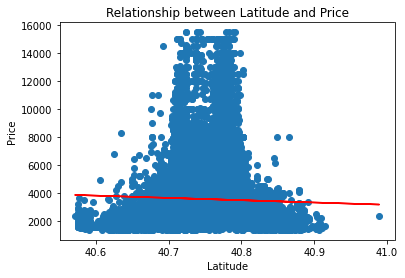

In [37]:
#plot the model line

plt.scatter(x, y)
plt.plot(X, new_y, color='r')
plt.title('Relationship between Latitude and Price')
plt.xlabel('Latitude')
plt.ylabel('Price')

plt.show()

In [48]:
#make a two-feature model

#define the multiple feature variable
multiple_X = df[['latitude', 'longitude']]

model2 = LinearRegression()

model2.fit(multiple_X, y)

new_y2 = model2.predict(multiple_X)

#compare the results
print(y[:15])
print(new_y2[:15])

0     3000
1     5465
2     2850
3     3275
4     3350
5     7995
6     3600
7     5645
8     1725
9     5800
10    1950
11    1675
12    3000
13    6895
14    3050
Name: price, dtype: int64
[2999.53175498 3583.65896249 4026.50603821 3504.21696521 3368.09343299
 4052.48893229 3587.47163222 3935.89086559 3307.56779766 3657.19954628
 3214.74223956 3258.04250474 3644.35413732 3772.64896142 3467.35017971]
